<a href="https://colab.research.google.com/github/LIvanoff/gus-detect/blob/master/notebook_yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обучение Yolov5

Клонируем Yolov5 с гитхаба

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15701, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 15701 (delta 7), reused 18 (delta 4), pack-reused 15672
Receiving objects: 100% (15701/15701), 14.49 MiB | 19.54 MiB/s, done.
Resolving deltas: 100% (10752/10752), done.


Устанавливаем зависимости нужные yolov5

In [ ]:
%cd yolov5
%pip install -r requirements.txt

Подключаем диск, в котором лежит ваш датасет

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip -q /content/drive/MyDrive/Studying/yolo/yolov5/dataset.zip -d /content/

In [ ]:
!unzip -q /content/drive/MyDrive/Studying/yolo/test.zip -d /content/

In [ ]:
!pip install -q wandb
import wandb
wandb.login()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 81.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# /content/yolov5/runs/train/exp/weights/best.pt

In [ ]:
!python train.py --img 640 --batch 40 --epochs 50 --data coco128.yaml --weights yolov5x.pt --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: drfrily (zavodchane). Use `wandb login --relogin` to force relogin
train: weights=yolov5x.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=40, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-169-geef637c Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB,

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.5 --source /content/test/

detect: weights=['/content/yolov5/runs/train/exp4/weights/best.pt'], source=/content/test/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-169-geef637c Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 322 layers, 86186872 parameters, 0 gradients, 203.8 GFLOPs
image 1/6 /content/test/1c35a7481627b8892ff46ec1f3e29d69.jpeg: 448x640 7 shipuns, 86.8ms
image 2/6 /content/test/JDU5dY97aoY.jpg: 480x640 (no detections), 85.4ms
image 3/6 /content/test/shipun83.jpg: 448x640 1 shipun, 12.4ms
image 4/6 /content/test/shipun85.jpg: 448x640 1 shipun, 12.1ms
image 5/6 /content/test/staya.jp

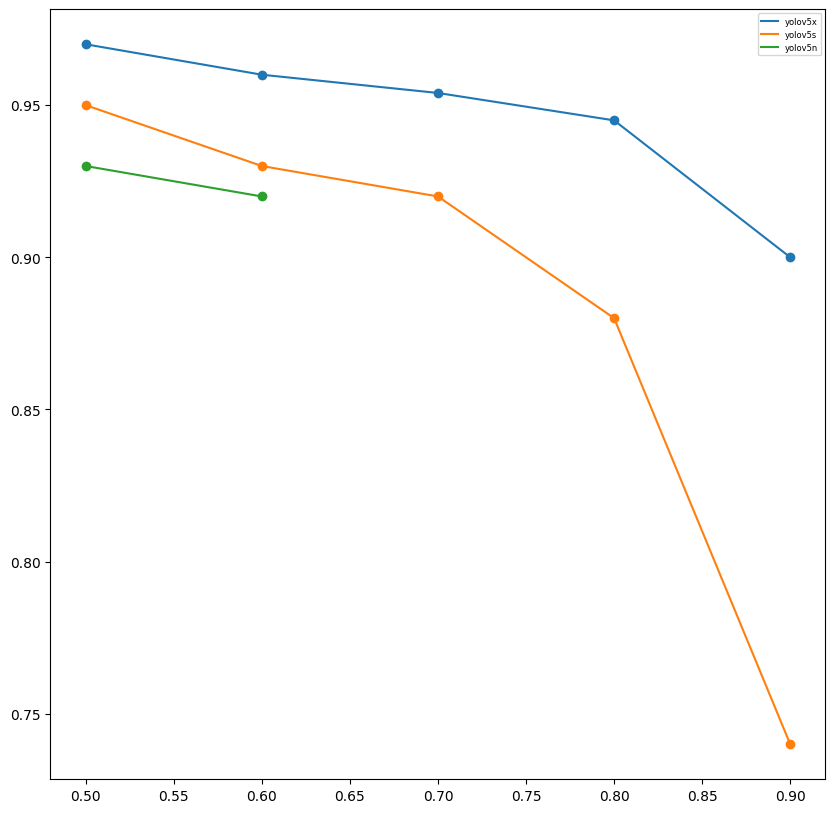

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

v5x_conf = [0.5, 0.6, 0.7, 0.8, 0.9]
v5x_acc = [0.97, 0.96, 0.954, 0.945, 0.9]
v5s_acc = [0.95, 0.93, 0.92, 0.88, 0.74]

v5m_acc = [97.14285714285714,	96.28571428571429,	95.42857142857143,	93.14285714285714,	86.85714285714286]
v5n_acc = [0.93, 0.92, 85.71428571428571, 79.14285714285715, 58.857142857142854]

plt.figure(figsize=(10,10))
plt.plot(v5x_conf, v5x_acc, label='yolov5x')
plt.scatter(v5x_conf, v5x_acc)

plt.plot(v5x_conf, v5m_acc , label='yolov5s')
plt.scatter(v5x_conf, v5m_acc )

plt.plot(v5x_conf, v5s_acc, label='yolov5s')
plt.scatter(v5x_conf, v5s_acc)

plt.plot(v5x_conf, v5n_acc, label='yolov5n')
plt.scatter(v5x_conf, v5n_acc)
plt.legend(prop={'size': 6})
plt.show()